<a href="https://colab.research.google.com/github/retuyu88/digitalentkominfo/blob/master/Copy_of_Project_2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

# Project Deep Learning

Buatlah model Deep Learning yang mampu mengklasifikasikan 20 kelas gambar dari dataset yang diberikan

## Instruksi Pengerjaan
1. Copy colab file ke drive masing-masing
1. Rename file colab dengan format : `Project_Kelompok.ipynb`
 * misal kelompok kalian adalah kelompok `1_4`, 
 * maka nama file haruslah `Project_1_4.ipynb`
1. Lengkapi bagian kode
1. Berikan dokumentasi yang jelas pada setiap cell kode
---

## [TASK]  Rename File
<font color='red' size=5><pre>Rename File Colab sesuai instruksi</pre></font>

---

## Load Modul dan Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image


from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from PIL import Image



W0814 14:39:07.551414 139778257889152 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



---
# Load Dataset

Proses ini akan mengunduh dataset gambar untuk kasus klasifikasi dengan 20 kelas berdasarkan dataset Pascal VOC 2007

## [TASK] Define input size

Rata-rata ukuran gambar adalah `(380, 470, 3)`

Untuk mengurangi komputasi dan memori yang digunakan, resize image menjadi ukuran yang lebih kecil

Tradeoffs:
* makin kecil gambar, akurasi bisa menurun
* makin besar gambar, makin berat di komputasi dan memori


<br>

<font color='red' size=5><pre>Definisikan ukuran citra yang akan digunakan!</pre></font>

Ukuran citra yang akan digunakan kami definisikan (128,128,3) . tidak terlalu kecil dan tidak terlalu besar sehingga akurasinya diharapkan optimal serta penggunaan memori yang tidak terlalu besar

In [0]:
input_shape = ( 128, 128, 3)

## Load Dataset

In [0]:
!wget 'https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py'

from project_data_loader import DataLoader

--2019-08-14 14:39:22--  https://raw.githubusercontent.com/adf-telkomuniv/FG_AI_Public/master/others/project_data_loader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2567 (2.5K) [text/plain]
Saving to: ‘project_data_loader.py’

project_data_loader 100%[===================>]   2.51K  --.-KB/s    in 0s      

2019-08-14 14:39:22 (68.1 MB/s) - ‘project_data_loader.py’ saved [2567/2567]



In [0]:
loader = DataLoader(input_shape)
(X_train, y_train), (X_val, y_val), (X_test, y_test), class_names = loader.load_data()

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


W0814 14:40:52.343468 139778257889152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset voc2007 downloaded and prepared to /root/tensorflow_datasets/voc2007/1.0.0. Subsequent calls will reuse this data.


W0814 14:41:11.153759 139778257889152 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
num_class = len(class_names)

print('terdapat',num_class,'kelas di dalam dataset')
print('daftar kelas:\n', class_names)


terdapat 20 kelas di dalam dataset
daftar kelas:
 ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


Cek ukuran dataset


In [0]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (2825, 128, 128, 3)
y_train.shape = (2825,)

X_val.shape   = (2888, 128, 128, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, 128, 128, 3)
y_test.shape  = (2000,)



**harusnya kalian akan mendapatkan hasil**:
<pre>X_train.shape = (2825, ??, ??, 3)
y_train.shape = (2825,)

X_val.shape   = (2888,  ??, ??, 3)
y_val.shape   = (2888,)

X_test.shape  = (2000, ??, ??, 3)
y_test.shape  = (2000,)

di mana `??` akan sesuai dengan ukuran `input_shape`
</pre>

In [0]:
X_test=X_test[:2000]

---
## [TASK] One-hot Label

<font color='red' size=5><pre>Ubah vektor y_train, y_val, dan y_test menjadi bentuk one hot matrix</pre></font>



In [0]:
y_train_hot = to_categorical(y_train)
y_val_hot   = to_categorical(y_val)
y_test_hot  = to_categorical(y_test)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)


**harusnya kalian akan mendapatkan hasil**:
<pre>y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)
</pre>

## View Dataset

Tampilkan 40 citra pertama dari data lain X_train

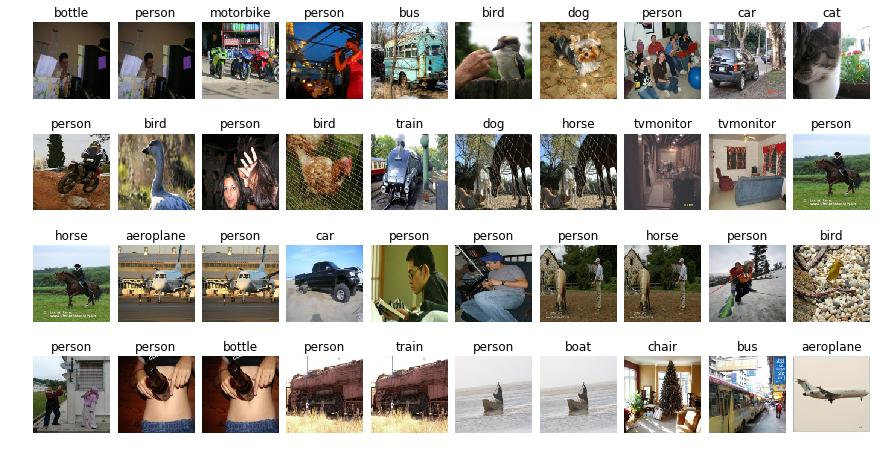

In [0]:
fig, ax = plt.subplots(4,10,figsize=(15,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,4):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10,:,:,:])
        ax[j,i].set_title(class_names[y_train[i+j*10]])
        ax[j,i].axis('off')
plt.show()

---
# Classification Model

## [TASK] Create your own model
<font color='red' size=5><pre>Buatlah model klasifikasimu sendiri!!</pre></font>


Misalnya:
* load pretrain
* define new layers
* define trainable layers
* have fun

pada tahap ini kami mengunakan arsitektur VGG16 kemudian menginstansiasi VGG16 dengan bobot hasil pretrained dg dataset ImageNet.

kemudian memilih layer yang akan dibekukan 

membekukan layer dimaksudkan untuk membuat weights bernilai tetap dan tidak dapat diubah kedepannya sehingga dapat mempersingkat waktu komputasi namun tidak banyak mengurangi akurasinya.

lalu menambahkan 

In [0]:
model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape, pooling='avg')

for layer in model.layers[:15]:
    layer.trainable = False
    
x = model.output
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)

myModel_selected = Model(inputs=model.input, outputs=predictions, name='VGG Selected')
for i, layer in enumerate(myModel_selected.layers):
    print(i, layer.name)

0 input_3
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_2
20 dense_4
21 dense_5


In [0]:
myModel_selected.summary()

Model: "VGG Selected"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

## [TASK] Compile Model
<font color='red' size=5><pre>Compile modelmu dengan loss dan metrik pilihanmu!</pre></font>



menggunakan optimizer adam dengan learning rate di set menjadi 0.0001

kemudian loss methodnya menggunakan categorical crosentropy

In [0]:
opt = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6)

myModel_selected.compile(loss='categorical_crossentropy',
                        optimizer=opt, metrics=['accuracy'])

---
# Data Preparation

## [TASK] Normalize Data

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Normalisasikan data jika diperlukan!</pre></font>


have fun

proses normalisasi data

In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)
y_test_hot = to_categorical(y_test)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (2825, 20)
y_val_hot.shape   = (2888, 20)
y_test_hot.shape  = (2000, 20)


## [TASK] Additional Scheme

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>Tambahkan skema dan implementasi yang ingin kalian lakukan</pre></font>


Misalnya:
* Data Augmentation
* Custom training function
* Checkpoint
* Learning Rate Annealing
* have fun

tahap ini dilakukan proses data augmentation

mendefinisikan schedule dari proses augmentasi yang akan dilakukan


lalu melakukan proses augmentasi

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

datagen.fit(X_train)

---
# Train and Testing




## [TASK] Train the Model
<font color='red' size=5><pre>Latih modelmu! <br>Definisikanlah batch size dan epoch!!<br>Gunakan data validasi</pre></font>

didefinisikan batch_size = 512 dan epoch = 10 


In [0]:
batch_size= 512
epochs = 10

lalu pada tahap ini akan dilakukan proses training pada data dengan batch size, epoch yang sudah didefinisikan diatas. proses training dilakukan pada data yang sudah di terapkan proses augmentasi.

In [0]:
hist_selected = myModel_selected.fit_generator(datagen.flow(X_train, y_train_hot,
                                             batch_size=batch_size),
                                epochs=epochs,
                                validation_data=(X_val, y_val_hot),shuffle=True)

Epoch 1/10
6/6 [==============================] - 23s 4s/step - loss: 3.8279 - acc: 0.1696 - val_loss: 2.7934 - val_acc: 0.2233
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 2.7146 - acc: 0.2665 - val_loss: 2.5746 - val_acc: 0.2905
Epoch 3/10
6/6 [==============================] - 17s 3s/step - loss: 2.4455 - acc: 0.3271 - val_loss: 2.3799 - val_acc: 0.3390
Epoch 4/10
6/6 [==============================] - 17s 3s/step - loss: 2.2574 - acc: 0.3642 - val_loss: 2.2187 - val_acc: 0.3691
Epoch 5/10
6/6 [==============================] - 17s 3s/step - loss: 2.0671 - acc: 0.4177 - val_loss: 2.0915 - val_acc: 0.4089
Epoch 6/10
6/6 [==============================] - 17s 3s/step - loss: 1.9096 - acc: 0.4418 - val_loss: 1.9419 - val_acc: 0.4245
Epoch 7/10
6/6 [==============================] - 17s 3s/step - loss: 1.7653 - acc: 0.4694 - val_loss: 1.8441 - val_acc: 0.4508
Epoch 8/10
6/6 [==============================] - 17s 3s/step - loss: 1.6109 - acc: 0.5087 - val_loss: 1

## Plot History Training

melakukan plotting data

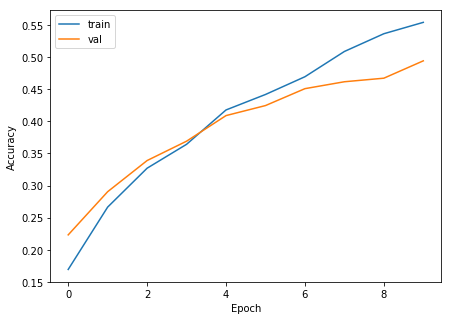

In [0]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(hist_selected.history['acc'], label='train')
plt.plot(hist_selected.history['val_acc'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## [TASK] Evaluasi Model
<font color='red' size=5><pre>Evaluasikan modelmu pada data test</pre></font>


In [0]:
scores = myModel_selected.evaluate(X_test, y_test_hot, verbose=1)

2000/2000 [==============================] - 6s 3ms/sample - loss: 1.7355 - acc: 0.5165


didapatkan akurasi sekitar 51.65% dan loss 1.735451705932617



In [0]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 1.735451705932617
Test accuracy: 51.65%


---
# Save Model


## [TASK] Save model into .h5 file

<font color='red' size=5><pre>Simpan model terbaikmu dengan nama file 'model_kelompok.h5'</pre></font>

* misal kelompok kalian adalah kelompok `3_2`,
* maka nama file model haruslah `model_3_2.h5`

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

myModel_selected.save('model_2_8.h5')
model_file = drive.CreateFile({'title' : 'model_2_8.h5'})                       
model_file.SetContentFile('model_2_8.h5')                       
model_file.Upload()

W0814 15:17:50.447174 139778257889152 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

## [TASK] Download model


<font color='red' size=5><pre>Download modelmu dari tab `Files`</pre></font>

## [TASK] Upload model


<font color='red' size=5><pre>Upload modelmu ke suatu storage cloud,<br>Kumpulkan link di google sheet daftar kelompok</pre></font>

## [TASK] Share File Colab


<font color='red' size=5><pre>Share dan Set file colaboratory ini agar bisa dilihat oleh orang lain<br>
Copy link file colaboratory
Lalu kumpulkan link di google sheet daftar kelompok</pre></font>

---
# Menguji Pada Image Dari Internet

<br>

**OPTIONAL TASK**<br>
<font color='blue' size=5><pre>tambahkan 5 gambar baru, dan coba modelmu terhadap gambar tersebut</pre></font>

* Search Gambar di Internet (Google Image)
* Copy Image Address
* Paste Image Address ke cell di bawah

In [0]:
!wget -O 'data_test_0.jpg' 'https://cdn.idntimes.com/content-images/post/20190110/c12-e35fa457b5c8da29b2c488cf2204dcbd_600x400.jpg'
!wget -O 'data_test_1.jpg' 'https://ik.imagekit.io/hj8sm3kk7/large/gallery/color/92/1579/suzuki-gsx-r150-color-635478.jpg'
!wget -O 'data_test_2.jpg' 'https://products1.imgix.drizly.com/ci-heineken-lager-6ea7dedfaaced647.jpeg?auto=format%2Ccompress&dpr=2&fm=jpeg&h=240&q=20'
!wget -O 'data_test_3.jpg' 'https://cdn2.tstatic.net/aceh/foto/b ank/images/ayam1_20161013_181913.jpg'
!wget -O 'data_test_4.jpg' 'https://www.rancahpost.com/wp-content/uploads/2019/06/Pamer-Biji-Depan-Kamera-saat-Majikan-Cover-Lagu-Kucing-Oren-ini-Viral.jpg'

--2019-08-14 15:00:36--  https://cdn.idntimes.com/content-images/post/20190110/c12-e35fa457b5c8da29b2c488cf2204dcbd_600x400.jpg
Resolving cdn.idntimes.com (cdn.idntimes.com)... 103.5.51.124, 103.5.51.123
Connecting to cdn.idntimes.com (cdn.idntimes.com)|103.5.51.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32693 (32K) [image/jpeg]
Saving to: ‘data_test_0.jpg’

data_test_0.jpg     100%[===================>]  31.93K   131KB/s    in 0.2s    

2019-08-14 15:00:38 (131 KB/s) - ‘data_test_0.jpg’ saved [32693/32693]

--2019-08-14 15:00:40--  https://ik.imagekit.io/hj8sm3kk7/large/gallery/color/92/1579/suzuki-gsx-r150-color-635478.jpg
Resolving ik.imagekit.io (ik.imagekit.io)... 13.224.227.91, 13.224.227.60, 13.224.227.31, ...
Connecting to ik.imagekit.io (ik.imagekit.io)|13.224.227.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79071 (77K) [image/jpeg]
Saving to: ‘data_test_1.jpg’

data_test_1.jpg     100%[===================>]  7

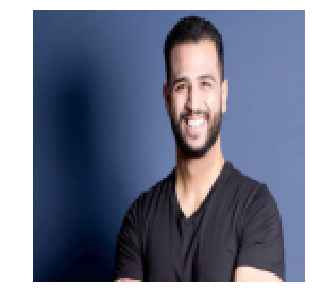

id kelas prediksi 14
kelas prediksi person


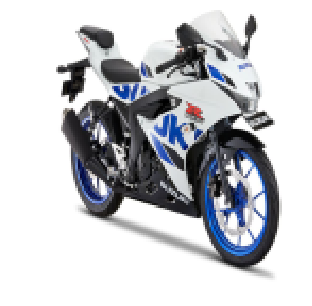

id kelas prediksi 13
kelas prediksi motorbike


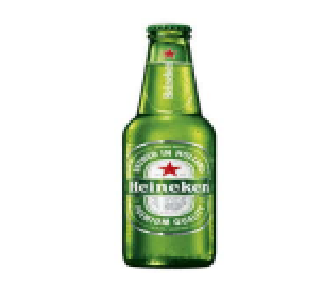

id kelas prediksi 4
kelas prediksi bottle


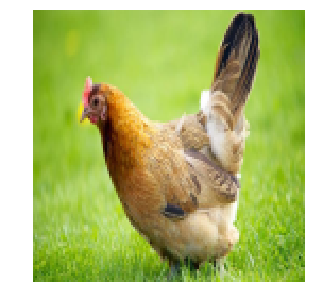

id kelas prediksi 2
kelas prediksi bird


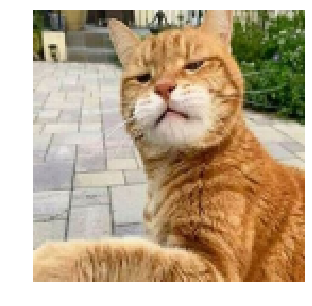

id kelas prediksi 7
kelas prediksi cat


In [0]:
for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0)
  pred = myModel_selected.predict(new_img2)
  class_id = np.argmax(pred)
  print('id kelas prediksi',class_id)
  print('kelas prediksi', class_names[class_id])

dari 5 gambar random yang diambil dari internet.
model yang dibangun berhasil menebak 4 gambar dengan benar , serta 1 gambar salah


<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>